In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

In [ ]:
data = pd.read_csv("/content/blood_cancer_data.csv")

In [ ]:
# Convert categorical attributes to numerical
data['blood_type'] = data['blood_type'].astype('category').cat.codes
data['hla_typing'] = data['hla_typing'].astype('category').cat.codes

In [ ]:
# Features and target variable
X = data[['age', 'blood_type', 'hla_typing']]
y = data['compatible']

In [ ]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train And Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

array([[-1.46567777, -1.27985309, -1.22186108],
       [-0.58802641,  0.39315749,  1.43435866],
       [ 0.41500371, -0.4433478 , -0.3364545 ],
       [-0.96416271,  1.22966277, -1.22186108],
       [-0.46264764, -1.27985309,  1.43435866],
       [ 0.03886742,  1.22966277, -0.3364545 ],
       [ 1.04189754,  0.39315749, -1.22186108],
       [ 1.66879137, -0.4433478 ,  1.43435866],
       [-1.08954147, -1.27985309,  0.54895208],
       [-0.71340518,  1.22966277, -1.22186108],
       [-0.08651135,  0.39315749, -0.3364545 ],
       [ 0.66576124, -1.27985309, -1.22186108],
       [ 1.41803384, -0.4433478 , -0.3364545 ],
       [-1.340299  ,  1.22966277,  0.54895208],
       [-0.33726888,  0.39315749,  1.43435866],
       [ 0.16424618, -1.27985309, -1.22186108],
       [ 0.91651878,  1.22966277,  1.43435866],
       [-0.83878394, -0.4433478 , -0.3364545 ],
       [ 0.28962495, -1.27985309,  0.54895208],
       [ 1.29265507,  0.39315749, -1.22186108],
       [-1.84181406,  1.22966277, -1.221

In [ ]:
y.shape

(100,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(80, 3)

In [ ]:
X_test.shape

(20, 3)

APPLYING KNN ALGO

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

model = KNN.fit(X_train,y_train)

Train and evaluate KNN for multiple K values


In [ ]:
k_values = range(1, 21)  # Test K values from 1 to 20
accuracy_test = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_test.append(knn.score(X_test, y_test))

accuracy of the model

In [ ]:
model.score(X_train , y_train)

0.8125

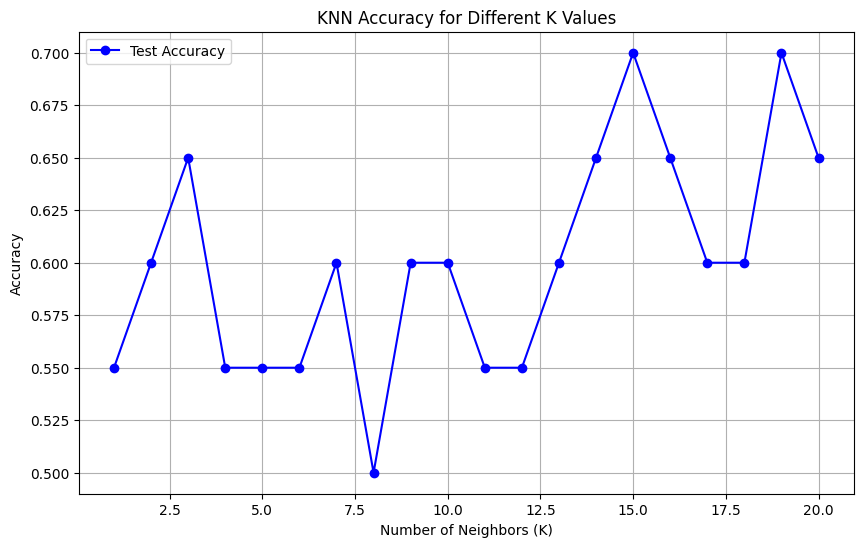

In [ ]:
# Plotting KNN performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_test, label='Test Accuracy', marker='o', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the trained model
import pickle as pkl
with open('minorprojectknn.pkl' , 'wb') as f:
    pkl.dump(model,f)